In [3]:
!pip install plotly

    100% |████████████████████████████████| 35.7MB 566kB/s ta 0:00:01   19% |██████▎                         | 7.0MB 604kB/s eta 0:00:48    19% |██████▎                         | 7.0MB 534kB/s eta 0:00:54    25% |████████▏                       | 9.2MB 657kB/s eta 0:00:41    37% |████████████                    | 13.3MB 720kB/s eta 0:00:32    91% |█████████████████████████████▎  | 32.6MB 1.1MB/s eta 0:00:03    94% |██████████████████████████████▎ | 33.8MB 997kB/s eta 0:00:02    98% |███████████████████████████████▍| 35.0MB 1.2MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


# Análise descritiva

Os pontos que vamos explorar antes de começar a construir o modelo baseline é:

* Comparação das classes dependentes ok
* Análise dos pontos para vitórias em Casa
* Análise dos pontos para vitória dos visitantes
* Relação preço de venda e pontos
* Relação gols x resultado

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import data_preparation as dp
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import seaborn as sns
from matplotlib import pyplot as plt
py.init_notebook_mode(connected=True)

In [2]:
# Import dataset
df = dp.main()
df.head()

Rodada       CasaID  VisitanteID  SGAtualCasa  SGAtualVisitante  \
40       1   Fluminense       Santos            0                 0   
41       1     Flamengo  Atlético-MG            0                 0   
42       1    Palmeiras        Vasco            0                 0   
43       1  Corinthians  Chapecoense            0                 0   
44       1     Cruzeiro    São Paulo            0                 0   

    RendimentoCasa  RendimentoVisitante ResultadosCasa ResultadosVisitante  
40             0.0                  0.0        vitoria             derrota  
41             0.0                  0.0         empate              empate  
42             0.0                  0.0        vitoria             derrota  
43             0.0                  0.0         empate              empate  
44             0.0                  0.0        vitoria             derrota

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 40 to 0
Data columns (total 9 columns):
Rodada                 380 non-null int64
CasaID                 380 non-null object
VisitanteID            380 non-null object
SGAtualCasa            380 non-null int64
SGAtualVisitante       380 non-null int64
RendimentoCasa         380 non-null float64
RendimentoVisitante    380 non-null float64
ResultadosCasa         380 non-null object
ResultadosVisitante    380 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [5]:
# Distribuição das classes dependentes

tracer1 =  go.Bar(x = df['ResultadosCasa'].value_counts().index,
                  y = df['ResultadosCasa'].value_counts(),
                  name = 'Casa')

tracer2 = go.Bar(x = df['ResultadosVisitante'].value_counts().index,
                 y = df['ResultadosVisitante'].value_counts(),
                 name = 'Visitante')

data = [tracer1,tracer2]

py.iplot(data)

### Comentários:

Como podemos ver nos gráficos, o nosso conjunto de dados nos submete que times que jogam em casa tem mais chance de ganhar e quando é como visitante tem menos chances, isso é perigoso pois pode dá um vies ao modelo que não queremos.

In [16]:
# Distribuição da variável de Saldo de gols:

# Add histogram data
sgC = df['SGAtualCasa']  
sgV = df['SGAtualVisitante']   

# Group data together
hist_data = [sgC, sgV]

group_labels = ['Saldo gols Casa','Saldo gols Visitante']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig)


In [22]:
print('Media: {}, Mediana: {} e Desvio padrão: {}'.format(df['SGAtualCasa'].mean(),df['SGAtualCasa'].median(),df['SGAtualCasa'].std()))
print('Media: {}, Mediana: {} e Desvio padrão: {}'.format(df['SGAtualVisitante'].mean(),df['SGAtualVisitante'].median(),df['SGAtualVisitante'].std()))

Media: -0.08421052631578947, Mediana: -1.0 e Desvio padrão: 8.54034430836543
Media: 0.08421052631578947, Mediana: 0.0 e Desvio padrão: 8.695873716407656


### Comentários:

Não é algo conclusivo, mas é bom ser analisado. O desvio padrão dessa variável está muito alto em comparação com o tamanho da média, isso quer dizer que existe a presença de outliers nos nossos dados.

In [20]:
# Distribuição da variável de Saldo de gols:

# Add histogram data
rendC = df['RendimentoCasa']  
rendV = df['RendimentoVisitante']   

# Group data together
hist_data = [rendC, rendV]

group_labels = ['Rendimento Casa','Rendimento Visitante']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig)

In [23]:
print('Media: {}, Mediana: {} e Desvio padrão: {}'.format(df['RendimentoCasa'].mean(),df['RendimentoCasa'].median(),df['RendimentoCasa'].std()))
print('Media: {}, Mediana: {} e Desvio padrão: {}'.format(df['RendimentoVisitante'].mean(),df['RendimentoVisitante'].median(),df['RendimentoVisitante'].std()))

Media: 1.6263157894736842, Mediana: 1.0 e Desvio padrão: 5.400316819130113
Media: 0.8736842105263158, Mediana: 1.0 e Desvio padrão: 5.665229047784929


### Comentários:

Da mesma forma que o anterior, os resultados extremos estão dispersos da mesma forma.

In [29]:
# Gráfico de dispersão RendimentoCasa x ResultadoCasa
# Create a trace
trace = go.Scatter(
    x = df['RendimentoVisitante'],
    y = df['SGAtualCasa'],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [8]:
# Correlação entre as variáveis
#rotulos = {x:y for x,y in zip(df['ResultadosCasa'].unique(),range(0,3))}
#df = df.replace(rotulos)

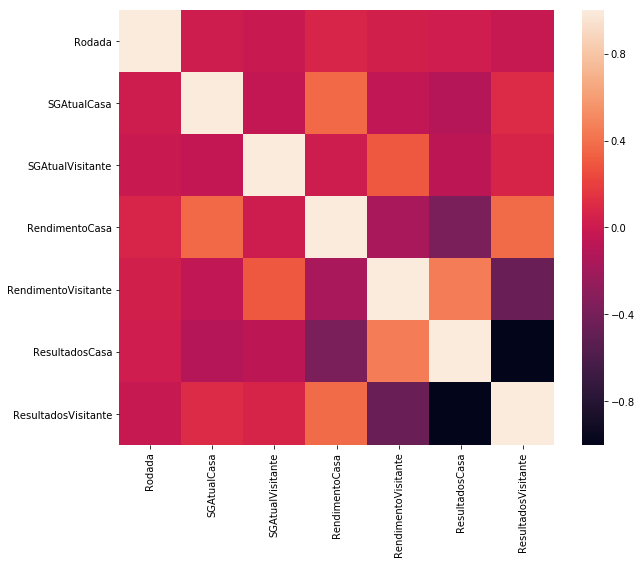

In [12]:
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 8))
#corr = df_uniao.drop('Ano', 1).corr()
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)

### Comentários:

Como podemos vver na nossa matriz de correlação utilizando o coeficiente de pearson, nossas features criadas possuem certa correlação com nossas variáveis dependentes. Nos deixando então que pode fazer sentido segundo a pesquisa em artigos sua criação, então elas serão inicialmente a nossa base para o nosso modelo.